C:\Users\trouvebe\AppData\Local\Temp\ipykernel_7704\4179268463.py:18: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  var_Fout_ref = pd.read_csv(file_path_ref + 'VAR_FOut_' + run_name_ref + '.csv', sep = ',')
C:\Users\trouvebe\AppData\Local\Temp\ipykernel_7704\4179268463.py:59: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  var_Fout_scen = pd.read_csv(file_path_scen + 'VAR_FOut_' + run_name_scen + '.csv', sep = ',')
C:\Users\trouvebe\AppData\Local\Temp\ipykernel_7704\4179268463.py:113: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<module 'matplotlib.pyplot' from 'c:\\Users\\trouvebe\\AppData\\Local\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

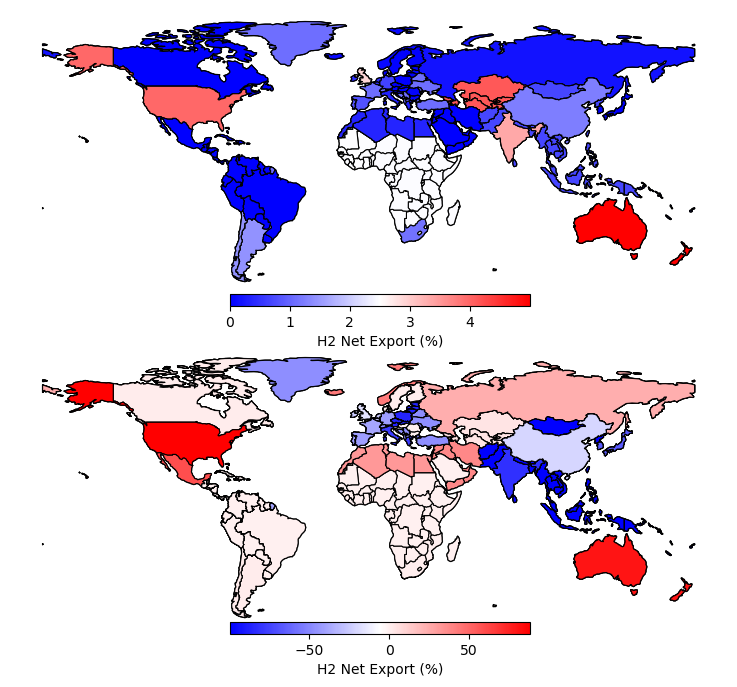

In [62]:
## H2 trade analysis
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase


def H2_trade(file_path_scen,file_path_ref, run_name_scen,run_name_ref,output_folder):

    var_Fout_ref = pd.read_csv(file_path_ref + 'VAR_FOut_' + run_name_ref + '.csv', sep = ',')
    var_Fout_ref = var_Fout_ref[var_Fout_ref['1'] == 'HH2']
    var_Fout_ref = var_Fout_ref[var_Fout_ref['2'] != 'H2_STG'] 
    var_Fout_ref['2'] = var_Fout_ref['2'].str.replace(r'TU_H2Ship.*', 'TU_H2Ship*', regex=True)
    var_Fout_ref['2'] = var_Fout_ref['2'].str.replace(r'TU_H2Pip.*', 'TU_H2Pip*', regex=True)
    var_Fout_ref['group_cnt'] = var_Fout_ref['4'].astype(str).str.cat(var_Fout_ref['3'].astype(str), sep='_')
    var_Fout_sub_ref = var_Fout_ref[~var_Fout_ref['2'].isin(['TU_H2Pip*','TU_H2Ship*'])]
    total_imp_ref = var_Fout_ref[var_Fout_ref['2'].isin(['TU_H2Pip*','TU_H2Ship*'])]
    total_imp_ref = total_imp_ref.groupby('group_cnt')['8'].sum()/120
    total_prod_ref = var_Fout_sub_ref.groupby('group_cnt')['8'].sum()/120

    var_FIn_ref = pd.read_csv(file_path_ref + 'VAR_FIn_' + run_name_ref + '.csv', sep = ',')
    var_FIn_ref = var_FIn_ref[var_FIn_ref['1'] == 'HH2']
    var_FIn_ref = var_FIn_ref[var_FIn_ref['2'] != 'H2_STG']
    var_FIn_ref['2'] = var_FIn_ref['2'].str.replace(r'TU_H2Ship.*', 'TU_H2Ship*', regex=True)
    var_FIn_ref['2'] = var_FIn_ref['2'].str.replace(r'TU_H2Pip.*', 'TU_H2Pip*', regex=True)
    var_FIn_ref['group_cnt'] = var_FIn_ref['4'].astype(str).str.cat(var_FIn_ref['3'].astype(str), sep='_')
    var_FIn_sub_ref = var_FIn_ref[~var_FIn_ref['2'].isin(['TU_H2Pip*','TU_H2Ship*'])]
    total_exp_ref = var_FIn_ref[var_FIn_ref['2'].isin(['TU_H2Pip*','TU_H2Ship*'])]

    total_exp_ref = total_exp_ref.groupby('group_cnt')['8'].sum()/120
    total_cons_ref = var_FIn_sub_ref.groupby('group_cnt')['8'].sum()/120

    total_net_exp_ref = pd.merge(total_prod_ref,total_cons_ref, how='inner',on='group_cnt').reset_index(drop=False).fillna(0)
    total_net_exp_ref['net_exp'] = total_net_exp_ref['8_x'] - total_net_exp_ref['8_y']     # Example operation for negative numbers
    total_net_exp_ref['share_imp'] = (total_net_exp_ref[total_net_exp_ref['net_exp'] < 0]['net_exp']/total_net_exp_ref[total_net_exp_ref['net_exp'] < 0]['8_y'])*100
    total_net_exp_ref['share_exp'] = (total_net_exp_ref[total_net_exp_ref['net_exp'] > 0]['net_exp']/total_net_exp_ref[total_net_exp_ref['net_exp'] > 0]['8_x'])*100
    total_net_exp_ref = total_net_exp_ref.fillna(0)
    total_net_exp_ref['total_share'] = total_net_exp_ref['share_exp'] + total_net_exp_ref['share_imp']

    def drop_last_substring(s):
        substrings = s.split('_')
        return '_'.join(substrings[:-1])
    
    
    total_net_exp_ref['region'] = total_net_exp_ref['group_cnt'].apply(drop_last_substring)
    total_net_exp_ref['mean_net_shr_exp'] = total_net_exp_ref.groupby('region')['total_share'].transform('mean')
    

    var_Fout_scen = pd.read_csv(file_path_scen + 'VAR_FOut_' + run_name_scen + '.csv', sep = ',')
    var_Fout_scen = var_Fout_scen[var_Fout_scen['1'] == 'HH2']
    var_Fout_scen = var_Fout_scen[var_Fout_scen['2'] != 'H2_STG'] 
    var_Fout_scen['2'] = var_Fout_scen['2'].str.replace(r'TU_H2Ship.*', 'TU_H2Ship*', regex=True)
    var_Fout_scen['2'] = var_Fout_scen['2'].str.replace(r'TU_H2Pip.*', 'TU_H2Pip*', regex=True)
    var_Fout_scen['group_cnt'] = var_Fout_scen['4'].astype(str).str.cat(var_Fout_scen['3'].astype(str), sep='_')
    var_Fout_sub_scen = var_Fout_scen[~var_Fout_scen['2'].isin(['TU_H2Pip*','TU_H2Ship*'])]
    total_imp_scen = var_Fout_scen[var_Fout_scen['2'].isin(['TU_H2Pip*','TU_H2Ship*'])]
    total_imp_scen = total_imp_scen.groupby('group_cnt')['8'].sum()/120
    total_prod_scen = var_Fout_sub_scen.groupby('group_cnt')['8'].sum()/120

    var_FIn_scen = pd.read_csv(file_path_scen + 'VAR_FIn_' + run_name_scen + '.csv', sep = ',')
    var_FIn_scen = var_FIn_scen[var_FIn_scen['1'] == 'HH2']
    var_FIn_scen = var_FIn_scen[var_FIn_scen['2'] != 'H2_STG']
    var_FIn_scen['2'] = var_FIn_scen['2'].str.replace(r'TU_H2Ship.*', 'TU_H2Ship*', regex=True)
    var_FIn_scen['2'] = var_FIn_scen['2'].str.replace(r'TU_H2Pip.*', 'TU_H2Pip*', regex=True)
    var_FIn_scen['group_cnt'] = var_FIn_scen['4'].astype(str).str.cat(var_FIn_scen['3'].astype(str), sep='_')
    var_FIn_sub_sen = var_FIn_scen[~var_FIn_scen['2'].isin(['TU_H2Pip*','TU_H2Ship*'])]
    total_exp_scen = var_FIn_scen[var_FIn_scen['2'].isin(['TU_H2Pip*','TU_H2Ship*'])]

    total_exp_scen = total_exp_scen.groupby('group_cnt')['8'].sum()/120
    total_cons_scen = var_FIn_sub_sen.groupby('group_cnt')['8'].sum()/120

    total_net_exp_scen = pd.merge(total_prod_scen,total_cons_scen, how='inner',on='group_cnt').reset_index(drop=False).fillna(0)
    total_net_exp_scen['net_exp'] = total_net_exp_scen['8_x'] - total_net_exp_scen['8_y']     # Example operation for negative numbers
    total_net_exp_scen['share_imp'] = (total_net_exp_scen[total_net_exp_scen['net_exp'] < 0]['net_exp']/total_net_exp_scen[total_net_exp_scen['net_exp'] < 0]['8_y'])*100
    total_net_exp_scen['share_exp'] = (total_net_exp_scen[total_net_exp_scen['net_exp'] > 0]['net_exp']/total_net_exp_scen[total_net_exp_scen['net_exp'] > 0]['8_x'])*100
    total_net_exp_scen = total_net_exp_scen.fillna(0)
    total_net_exp_scen['total_share'] = total_net_exp_scen['share_exp'] + total_net_exp_scen['share_imp']

    def drop_last_substring(s):
        substrings = s.split('_')
        return '_'.join(substrings[:-1])
    
    
    total_net_exp_scen['region'] = total_net_exp_scen['group_cnt'].apply(drop_last_substring)
    total_net_exp_scen['mean_net_shr_exp'] = total_net_exp_scen.groupby('region')['total_share'].transform('mean')



    country_to_region = pd.read_excel('D:/Veda/Veda_models/kinesys_test - Copie/SubRes_Tmpl/SubRES_REZoning_Sol-Win_Trans.xlsx',sheet_name ='AVA')
    country_to_region = country_to_region.iloc[3:].set_axis(country_to_region.iloc[2], axis=1).iloc[:,2:]
    country_to_region['Country'] = ''

    for index, row in country_to_region.iterrows():
        parts = row['PSET_PN'].split('-')
        country_to_region.at[index, 'Country'] = parts[1].strip()



    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 

    total_trade_map_ref = country_to_region.merge(total_net_exp_ref, how='outer', left_on='Region', right_on='region').reset_index(drop=True).fillna(0)
    world_trade_map_ref = world.merge(total_trade_map_ref, how='left', left_on='iso_a3', right_on='Country').reset_index(drop=True).dropna()
    world_trade_map_ref.shape

    total_trade_map_scen = country_to_region.merge(total_net_exp_scen, how='outer', left_on='Region', right_on='region').reset_index(drop=True).fillna(0)
    world_trade_map_scen = world.merge(total_trade_map_scen, how='left', left_on='iso_a3', right_on='Country').reset_index(drop=True).dropna()
    total_trade_map_scen.shape


    bwr_cmap = plt.cm.bwr
    
    fig, ax = plt.subplots(figsize=(15, 8))
    trade_map = world_trade_map_scen 
    colorbar_positions = [0.42, 0.2, 0.2, 0.02]
    world.plot(ax=ax, color='white', edgecolor='black')
    trade_map.plot(column='mean_net_shr_exp', cmap=bwr_cmap, linewidth=0.8, ax=ax, edgecolor='black', legend=False)

    plt.title('Average H2 Net Export Share of the Production')
    plt.ylim([-60, 90])
    plt.axis('off')

    min_val = trade_map['mean_net_shr_exp'].min()
    max_val = trade_map['mean_net_shr_exp'].max()
    norm = Normalize(vmin=min_val, vmax=max_val)

    ax_legend = fig.add_axes(colorbar_positions)
    colorbar = ColorbarBase(ax_legend, cmap=bwr_cmap, norm=norm, orientation='horizontal')
    colorbar.set_label('H2 Net Export (%)')

    plt.savefig(output_folder + 'H2net_export_map.pdf'
            , format ='pdf',
            bbox_inches='tight')
    return plt